In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn


Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

In [3]:
print("Type\tCount")
print((train[187]).value_counts())

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [4]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)


train shape :  (87554, 188)
test shape :  (21892, 188)


In [5]:
label_train=[]                              # making multiclass to binary class now labels_train containing either 0 or 1 
for i in train.iloc[:,187] :
  if i not in  [0.0]:
    label_train.append(1)
    #print("value is",i)
  else:
    label_train.append(0)
    #print("value",i)
    

In [6]:
label_test=[]                              # making multiclass to binary class.now labels_test containing either 0 or 1 
for i in test.iloc[:,187]:
  if i not in  [0.0]:
    label_test.append(1)
    #print("value is",i)
  else:
    label_test.append(0)
    #print("value",i)


In [7]:
#create new df 
labels_train = pd.DataFrame({'col':label_train})
#print (labels_train)

labels_test = pd.DataFrame({'col':label_test})
#print (labels_test)


In [8]:
label_train=np.asarray(label_train)

label_test=np.asarray(label_test)

In [9]:
train[187] = labels_train    # replace labels column with binary labels
test[187] =  labels_test

In [10]:
print('Count of all classes in training dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in test dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in training dataset
Type	Count
0    72471
1    15083
Name: 187, dtype: int64
*************************************
Count of all classes in test dataset
Type	Count
0    18118
1     3774
Name: 187, dtype: int64


In [11]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [12]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [13]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [15]:
# here we are having a class number for each sample
print("Class label of first sample :", label_train[83456])

Y_train = np_utils.to_categorical(label_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(label_test)

Class label of first sample : 1
After converting the output into a vector :  [0. 1.]


In [16]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 2
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 100

In [17]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
feature_test (21892, 187)
Y_test (21892, 2)


In [18]:
# 7. MLP + Dropout + AdamOptimizer

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(128, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

87554/87554 [==============================] - 3s 29us/step - loss: 0.1216 - accuracy: 0.9616 - val_loss: 0.0892 - val_accuracy: 0.9713
Epoch 46/100
87554/87554 [==============================] - 1s 17us/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.0867 - val_accuracy: 0.9718
Epoch 47/100
87554/87554 [==============================] - 2s 17us/step - loss: 0.1133 - accuracy: 0.9635 - val_loss: 0.0866 - val_accuracy: 0.9724
Epoch 48/100
87554/87554 [==============================] - 1s 17us/step - loss: 0.1100 - accuracy: 0.9644 - val_loss: 0.0869 - val_accuracy: 0.9722
Epoch 49/100
87554/87554 [==============================] - 1s 17us/step - loss: 0.1099 - accuracy: 0.9651 - val_loss: 0.0845 - val_accuracy: 0.9731
Epoch 50/100
87554/87554 [==============================] - 2s 17us/step - loss: 0.1080 - accuracy: 0.9655 - val_loss: 0.0836 - val_accuracy: 0.9732
Epoch 51/100
87554/87554 [==============================] - 1s 17us/step - loss: 0.1066 - accuracy: 0.9657 - val_loss: 

87554/87554 [==============================] - 2s 22us/step - loss: 0.0833 - accuracy: 0.9731 - val_loss: 0.0697 - val_accuracy: 0.9784


In [19]:
y_pred = model_drop.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.97      0.90      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.95      0.96     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.06966984133317279
Test accuracy: 0.9784396290779114


<IPython.core.display.Javascript object>


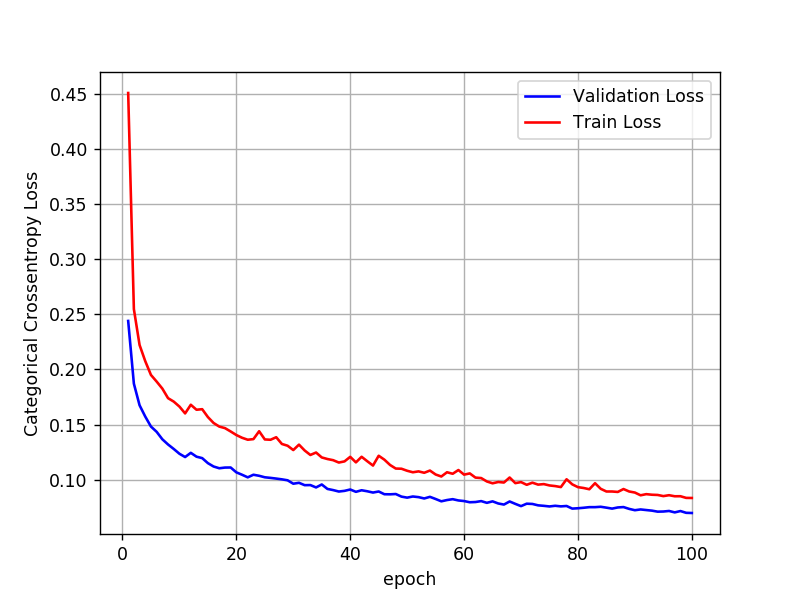

In [20]:
score = model_drop.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [22]:
#Test score: 0.06966984133317279
#Test accuracy: 0.9784396290779114

             # precision    recall  f1-score   

 #       0       0.98      0.99      0.99     
 #       1       0.97      0.90      0.94      

#    accuracy   :  0.98     
 